# Приоритизация гипотез и анализ A/B-теста

Отдел маркетинга интернет-магазина подготовил список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.


## Описание данных

Данные для первой части:


Путь к файлу: [Скачать датасет](https://code.s3.yandex.net/datasets/hypothesis.csv)

Структура `hypothesis.csv`:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Путь к файлу: [Скачать датасет](https://code.s3.yandex.net/datasets/orders.csv)

Структура `orders.csv`:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Путь к файлу: [Скачать датасет](https://code.s3.yandex.net/datasets/visitors.csv)

Структура `visitors.csv`:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

*План работы*

*Часть 1. Приоритизация гипотез.*

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

*Часть 2. Анализ A/B-теста.*

Задача - **проанализировать A/B-тест**:

1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выбереи границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#выгрузим данные из файла с гипотезами

try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.set_option('display.max_columns', None)

In [3]:
def first_data_check(data):
    return display(data.head(20)), display(data.info()), print('Количество пропусков:'), display(data.isna().sum()), print('Количество дубликатов:', (data.duplicated().sum()))

In [4]:
first_data_check(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Количество пропусков:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Количество дубликатов: 0


(None, None, None, None, None)

In [5]:
hypothesis.columns = [col.lower() for col in hypothesis.columns] #приведем названия столбцов к нижнему регистру
hypothesis.columns #проверка

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [6]:
pd.set_option("display.max_colwidth", 200) #посмотрим, что за гипотезы представлены в таблице
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE для приоритизации гипотез

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(3)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


### Фреймворк RICE для приоритизации гипотез

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Выводы


**Наиболее перспективные гипотезы по ICE: 8, 0, 7**

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6**

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Приоритизация гипотез при применении RICE вместо ICE изменилась, это связано с тем, что у гипотез 7, 2, 6 высокий параметр `reach` (составляет 10, 8 и 5 соответственно). В список RICE не вошла гипотеза 8, так как у нее параметр `reach` составляет всего 1. Для дальнейшей работы рекомендуется взять гипотезы **0, 2, 7, 8**, так как гипотезы 0 и 7 вошли в оба рейтинга, у гипотезы 8 выcокий параметр `impact`, а у гипотезы 2 высокий параметр `reach`.

## Часть 2. Анализ A/B-теста.

In [9]:
#Выгрузим данные из файлов с заказами и посетителями.

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [10]:
#выполним первчиную проверку данных с помощощью функции first_data_check

first_data_check(orders)
first_data_check(visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Количество пропусков:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество дубликатов: 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Количество пропусков:


date        0
group       0
visitors    0
dtype: int64

Количество дубликатов: 0


(None, None, None, None, None)

In [11]:
#заметили, что формат в столбце с датой - object, исправим на datetime

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
      
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
orders.columns = orders.columns.str.lower() #приведение к нижнему регистру
orders.rename(columns = {'transactionid' : 'transaction_id', 
                         'visitorid' : 'visitor_id'}, inplace = True) #приведем в порядок названия столбцов
                
print(orders.columns) #проверка

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [13]:
#проверим, есть ли пользователи, попавшие в обе группы

orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique').query('group > 1').count()

group    58
dtype: int64

Общее количество пользователей - 1197, таким образом, доля попавших в обе группы составила 4.8%, небольшой процент, не будет критически влиять на результат теста, поэтому оставим как есть.

In [14]:
# узнаем, за какой период представлены данные в таблицах

print('Период данных таблицы orders:', orders['date'].min(), '-', orders['date'].max())
print('Период данных таблицы visitors:', visitors['date'].min(), '-', visitors['date'].max())

# узнаем, сколько групп в А/В тесте

print('Группы A/B теста в таблице orders:', orders['group'].unique())
print('Группы A/B теста в таблице visitors:', visitors['group'].unique())

# проверим количество пользователей в каждой группе

print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))

Период данных таблицы orders: 2019-08-01 00:00:00 - 2019-08-31 00:00:00
Период данных таблицы visitors: 2019-08-01 00:00:00 - 2019-08-31 00:00:00
Группы A/B теста в таблице orders: ['B' 'A']
Группы A/B теста в таблице visitors: ['A' 'B']
Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916


Период, за который представлены данные обеих таблиц, совпадает, в тесте участвуют две группы А и В, количество пользователей группы В больше количества пользователей группы А на 0.96%, разница менее 1%. Можно приступать к анализу А/В теста.

###  График кумулятивной выручки по группам

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


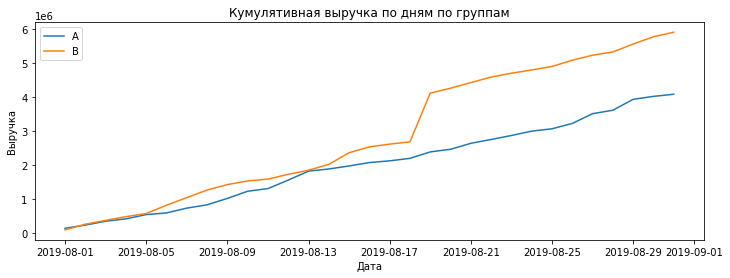

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend()
None

Сегменты А и В шли ровно только в самом начале, затем сегмент В занимал лидирующую позицию на протяжении всего теста, кроме одного короткого промежутка, где показатели совпали. На половине теста сегмент В резко вырвался вперед и продолжал лидировать. Возможно на результат оказывают влияние аномально большие заказы.

###  График кумулятивного среднего чека по группам

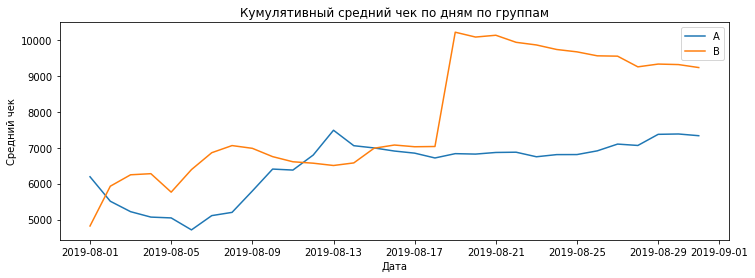

In [16]:
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
None

На графике кумулятивного среднего чека по дням и по группам также видно, что сегмет группы В резко возрастает с середины теста. Необходимо провести анализ выбросов.

###  График относительного изменения кумулятивного среднего чека группы B к группе A

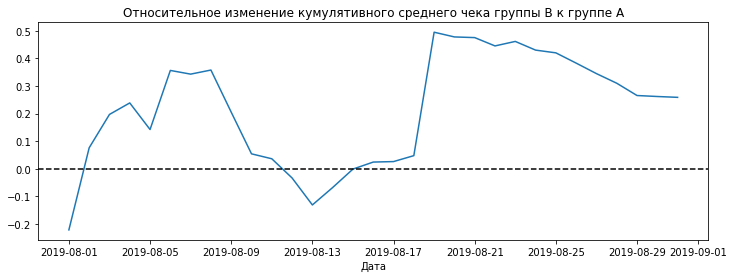

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
None

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
None

По графику видно несколько значительных изменений в течение всего теста, скорее всег это даты аномальных заказов.

###  График кумулятивной конверсии по группам

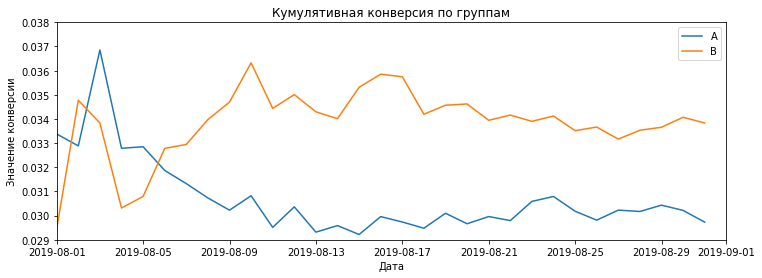

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Значение конверсии')
plt.xlabel('Дата')
None

# задаем масштаб осей
plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), 0.029, 0.038])
None

По графику видно, что сегмент В выровнялся и зафиксировался примерно около одного значения, показывая результат лучше, чем сегмент А.

###  График относительного изменения кумулятивной конверсии группы B к группе A

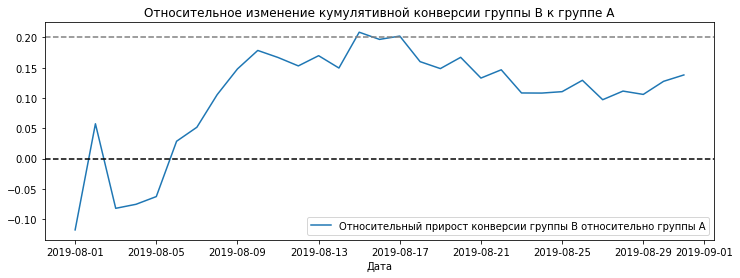

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
None

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
None

Почти на протяжении всего теста сегмент В лидирует по конверсии, в середине теста он достиг прироста в 20%, однако после наблюдается снижение и фиксация результата в промежутке 10-15% прироста по конверсии 

###  Точечный график количества заказов по пользователям

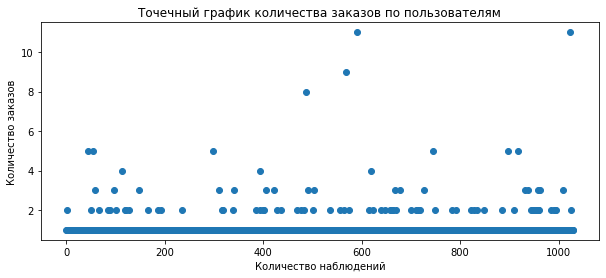

In [20]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество наблюдений')
None

Мы видим, что пользователей, совершивших более двух транзакций немного. Посчитаем выборочные перцентили, чтобы точнее ответить на вопрос о количестве заказов по пользователям.

###  95-й и 99-й перцентили количества заказов на пользователя

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей совершили больше 2 заказов и не более 1% пользователей совершили более 4 заказов. Граница для определения аномальных пользователей - 2 заказа.

###  Точечный график стоимостей заказов

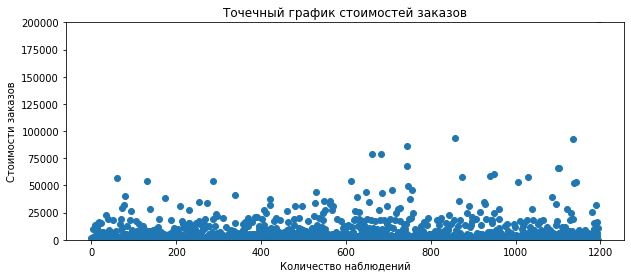

In [22]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимости заказов')
plt.xlabel('Количество наблюдений')
plt.ylim([0, 200000])
None

Видно, что заказов более чем на 25000 не так уж и много. Посчитаем выборочные перцентили, чтобы точнее ответить на вопрос о том, много или мало заказов больше 25000.

###  95-й и 99-й перцентили стоимости заказов

In [23]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% заказов стоимость дороже, чем 28000, не более, чем у 1% заказов стоимость дороже 58000. Граница для определения аномальных заказов - 28000.

###  Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Сформулируем гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

Для проверки гипотез будем использовать Критерий Манна-Уитни, так как он является непараметрическим критерием и не требует наличия нормального распределения сравниваемых совокупностей. U-критерий подходит для сравнения малых выборок.Условием для применения U-критерия Манна-Уитни является отсутствие в сравниваемых группах совпадающих значений признака (все числа – разные) или очень малое число таких совпадений.

Уровень alpha - 0.05

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print('p-value для сравнения среднего кол-ва заказов между группами:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем кол-ве заказов между группами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value для сравнения среднего кол-ва заказов между группами: 0.01679
Относительное различие в среднем кол-ве заказов между группами: 0.138


P-value меньше 0.05, поэтому мы можем овергнуть нулевую гипотезу - присутствуют статистически значимые различий в среднем числе заказов между группами. Относительный прирост среднего группы B к конверсии группы А равен 13.8%.

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:
- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [25]:
print('p-value для сравнения среднего чека между группами:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value для сравнения среднего чека между группами: 0.729
Относительное различие в среднем чеке между группами: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека группы А - на 25.9%.

###  Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Очистим данные от аномалий. Напомним, что 95-й и 99-й перцентили стоимостей заказов равны 28 000 и  58 233.2 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
Ранее мы определили границу для аномальных пользователей - 2 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 5% заказов с наибольшей стоимостью.

Сформулируем гипотезы:

- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99]))[0]]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99]))[0]]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], [95, 99]))[0]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5)) # таблица с аномальными заказами

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) # очищенные данные о заказах группы А

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) # очищенные данные о заказах группы В

print('p-value для сравнения среднего кол-ва заказов между группами:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем кол-ве заказов между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value для сравнения среднего кол-ва заказов между группами: 0.01304
Относительное различие в среднем кол-ве заказов между группами: 0.173


Как и в случае с сырыми данными, P-value меньше 0.05, поэтому мы можем овергнуть нулевую гипотезу - присутствуют статистически значимые различия в среднем числе заказов между группами. Относительный прирост среднего кол-ва заказов группы B к заказам группы А вырос и теперь равен 17.3%.

###  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:

- Нулевая: различий в среднем чеке между группами нет.
- Альтернативная: различия в среднем чеке между группами есть.

In [28]:
print('p-value для сравнения среднего чека между группами:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем чеке между группами:'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value для сравнения среднего чека между группами: 0.738
Относительное различие в среднем чеке между группами:-0.020


P-value увеличился по сравнению с результатом анализа "сырых" данных и по-прежнему демонстрирует, что различий в среднем чеке между группами нет, при этом средний чек группы B стал незначительно ниже среднего чека группы А - на 2%, а был значительно выше, почти 26%.

###  Выводы и принятие решения

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Имеющиеся факты:
- Присутствуют статистически значимые различия в среднем числе заказов между группами и по «сырым», и по данным после фильтрации аномалий, наблюдается значительный прирост среднего кол-ва заказов группы B к заказам группы А, равный 17.3%.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A
- График различия среднего чека по «сырым» данным показал колебания, однако после удаления аномалий, относительное различие в среднем чеке между группами уменьшилось и даже показало незначительный выигрыш группы А.

Согласно условиям кейса, мы работаем над увеличением выручки интернет-магазина. Так как средний чек в группах А и В почти одинаковый, но в группе В наблюдается прирост среднего количества заказов по сравнению с группой А, также конверсия группы В выше, чем в группе А, поэтому мы можем остановить тест и сделать вывод, что **группа В оказалась более прибыльной для интернет-магазина**.